# Assignment 3 - Supervised Learning

## *Joseph Krinke*
Netid: jdk61

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: (1) identifying a hypothesis function set of models, (2) determining a loss/cost/error/objective function to minimize, and (3) minimizing that function through gradient descent
2. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
3. Gain practice in implementing machine learning algorithms to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
5. Work with imagery data and the basics of computer vision approaches to machine learning
6. Develop an understanding the optimal minimum misclassification error classifier (Bayes' classifier)

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \dfrac{e^x}{1+e^{x}}= \dfrac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^{\intercal} \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $\mathbf{x}_i=[x_{i,0}, x_{i,1}, x_{i,2}]^{\intercal}$, and $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model parameters. For one sample, $(y_i, \mathbf{x}_i)$, this is given as:

$$P(Y=y_i|X=\mathbf{x}_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

*Aside: the careful reader will recognize this expression looks different from when we talk about the likelihood of our data given the true class label, typically expressed as $P(x|y)$, or the posterior probability of a class label given our data, typically expressed as $P(y|x)$. In the context of training a logistic regression model, we know the training $\mathbf{x}$ values and $y$ values, so the above probability is primarily a function of the logistic regression parameters, $\mathbf{w}$. It's our goal to use this to choose the parameters to maximize the probability of our data by adjusting our model*

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function for all the $N$ samples in our training dataset that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. ${\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.
\nabla_
**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]^{\intercal}$, and output the class confidence probabilities, $P(Y=y_i|X=\mathbf{x}_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm.  In doing this we'll need to make some assumptions about and/or experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

Please compute your cost function for a batch as the average cost for the data in your current batch (in this case, a batch is your entire training dataset). In other words, divide your cost by the number of samples in each batch.

**(j)** Design your approach so that at each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data (no output is necessary here, but this is used in the following question).

**(k)** Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. Show the gradient descent process for different learning rates by plotting the resulting cost as a function of each iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question. 

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatter-plot and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

(a) The likelihood function we are trying to maximize is the following. 
$$P(y|X) = \prod_{i=1}^{N}\hat{y}_i^{y_i}[1-\hat(y_i)]^{1-y_i}$$

(b) The cost function is given by. 
$$C(w) = -\sum_{i=1}^{N}(y_i log(\hat{y_i}) + (1-y_i)log(1-\hat{y_i}))$$

(c) The gradient of the cost function is given by
$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[(y-\hat{y}_i)x_0, (y-\hat{y}_i))x_1, (y-\hat{y}_i))x_2\right]$.

(e) The data does not appear to be perfectly seperable. There are a number of points in class 1 contained within the class 2 cluster in the center. A logistic regression model would do well at classifying the class 0 points (in the center), but would have difficulty classifying the class 1 points contained in the center cluster. 

The code below loads the dataset and plots the groups by class.

In [2]:
#Importing data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
data = pd.read_csv('A3_Q1_data.txt')
data.head()

,x1,x2,y
0,2.553124,0.337757,0.0
1,-0.877757,0.045790,1.0
2,-0.903528,0.368076,1.0
3,-1.532152,-0.863737,1.0
4,-0.046954,-0.388761,1.0


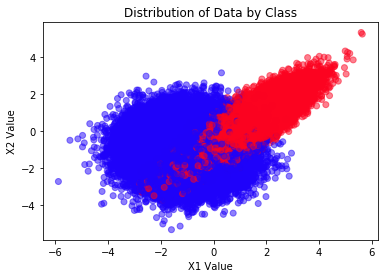

In [3]:
#Plotting data
from matplotlib.colors import ListedColormap
from math import pow

cmap_class = ListedColormap(['#fc0320','#1f02fa' ]) #Creating corn-esque color map
plt.scatter(data['x1'], data['x2'], c = data['y'], alpha = .5, cmap=cmap_class)
plt.xlabel('X1 Value')
plt.ylabel('X2 Value')
plt.title('Distribution of Data by Class')

plt.show()

(f) There do not appear to be any missing observations in the data. The data looks pretty clean, as the classes are exactly evenly distributed and both x variables have simililar minimums, maximums, and standard deviations. It does not appear that any transformations are needed. 

In [4]:
#Getting summary statistics of data.
print(data.describe())

#Getting count of incomplete obervations. 
print(data.isnull().sum())

                  x1             x2              y
count  100000.000000  100000.000000  100000.000000
mean        0.048529      -0.397106       0.500000
std         1.452409       1.164015       0.500003
min        -5.886436      -5.352265       0.000000
25%        -1.041007      -1.206343       0.000000
50%         0.039551      -0.401099       0.500000
75%         1.143536       0.402899       1.000000
max         5.634476       5.317718       1.000000
x1    0
x2    0
y     0
dtype: int64


(g)-(j)

In [32]:
import random
np.random.seed(0)
#Defining logistic regression class
def logisticreg (x_values, weights):
        line = np.exp(weights[0] + weights[1] * x_values[:,0] +  weights[2] * x_values[:,1]) 

        p = line/ (1+line)
        return(p)

#Cost function calculator

def CostFunction(y_value, predicted_prob):
    cost = -np.average((y_value*np.log(predicted_prob+1e-7))+((-y_value+1)*np.log(- predicted_prob +1+1e-7)))
    
    return(cost)



#Algorithm initialization that includes costs. 
def GradientDescentCost(train_data, test_data, l_rate):
   #Seperate x and y values
    x_train = train_data[:,:-1]
    y_train = train_data[:,-1]
    x_test = test_data[:,:-1]
    y_test = test_data[:,-1]
    length = train_data.shape[0]
    weights = np.array([random.random(), random.random(), random.random()])
    train_costs = [] #Array to hold training and test costs for part k
    test_costs = []
    cost_train = CostFunction(y_train,logisticreg(x_train, weights)) #Find initial cost with random weights
    cost_change = 10 #Create variable to hold cost change over each iteration. This will determine when the algorithm stops. 
    test_costs.append(CostFunction(y_test, logisticreg(x_test,weights))) #Add initial cost on test data.
    train_costs.append(cost_train) #Add initial cost on training data. 
    while(cost_change > (10**-6)):
        weights[0] = weights [0] - ((l_rate/length)* np.sum((logisticreg(x_train, weights) - y_train)))
        weights[-2:]= weights[-2:] - ((l_rate / length) * (x_train.T @ (logisticreg(x_train, weights) - y_train)))
        new_cost = CostFunction(y_train, logisticreg(x_train, weights))
        cost_change = cost_train-new_cost
        cost_train = new_cost
        train_costs.append(cost_train)
        test_costs.append(CostFunction(y_test, logisticreg(test_data,weights)))

    return(weights, train_costs, test_costs)


def GradientDescentFit(train_data, l_rate):
   #Seperate x and y values
    x_train = train_data[:,:-1]
    y_train = train_data[:,-1]
    length = train_data.shape[0]
    weights = np.array([random.random(), random.random(), random.random()])
    cost_train = CostFunction(y_train,logisticreg(x_train, weights)) #Find initial cost with random weights
    cost_change = 10 #Create variable to hold cost change over each iteration. This will determine when the algorithm stops. 
    while(cost_change > (10**-6)):
        weights[0] = weights [0] - ((l_rate/length)* np.sum((logisticreg(x_train, weights) - y_train)))
        weights[-2:]= weights[-2:] - ((l_rate / length) * (x_train.T @ (logisticreg(x_train, weights) - y_train)))
        new_cost = CostFunction(y_train, logisticreg(x_train, weights))
        cost_change = cost_train-new_cost
        cost_train = new_cost

    return(weights)
    
    

    
    

k

In [6]:
#Creating training and test sets
numpy_data = data.to_numpy()
randnums = np.random.randn(len(data)) < .70
training = numpy_data[randnums]
test_data = numpy_data[~randnums]


In [7]:
#Defining function to plot the cost trends.

def costplot(GradOutput, l_rate):
    plt.plot(GradOutput[1], label = 'Training Cost')
    plt.title('Training and Test Cost With Learning Rate:{0:.5f}'.format(l_rate))
    plt.ylabel('Cost')
    plt.xlabel('Number of Iterations')
    plt.plot(GradOutput[2], label = 'Test Cost')
    plt.show()


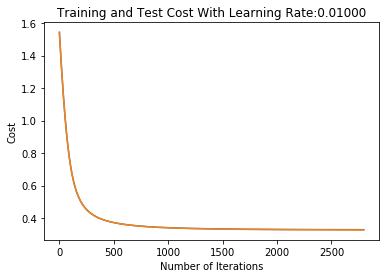

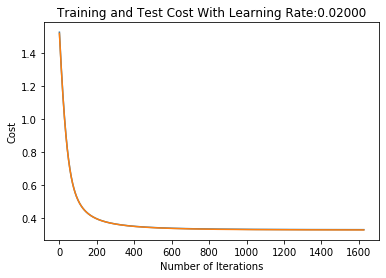

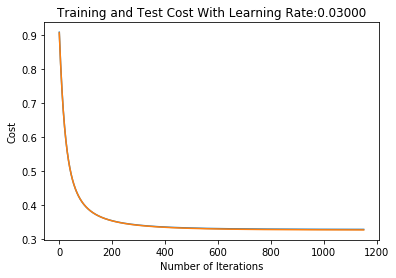

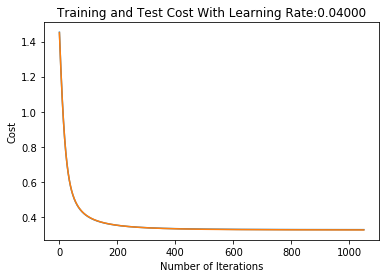

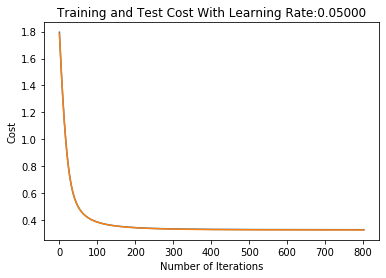

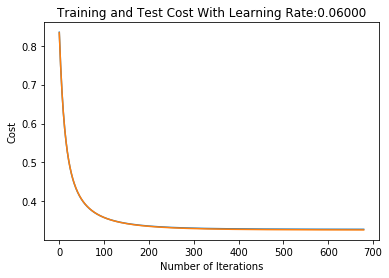

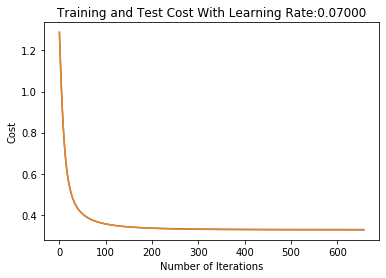

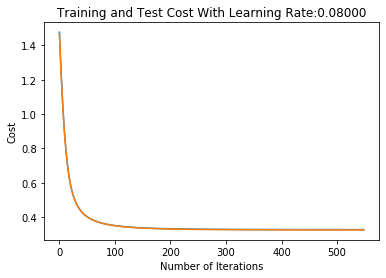

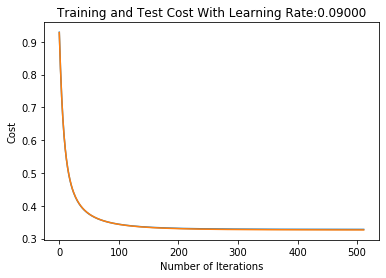

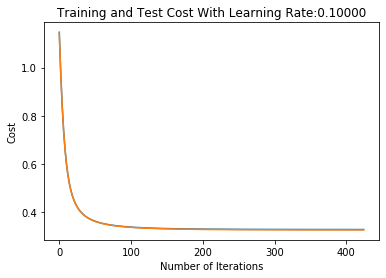

In [8]:
#Producing plots for values of the learning rate from .01 to .1, increasing by .01 each time.
for i in range(10):
    costplot(GradientDescentCost(training,test_data,(i/100)+.01),(i/100)+.010)

It appears that the optimal value for the learning rate is approximately .10.

(i) Testing model performance through cross validation. 

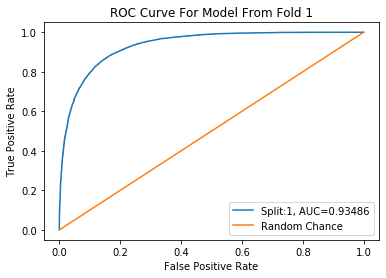

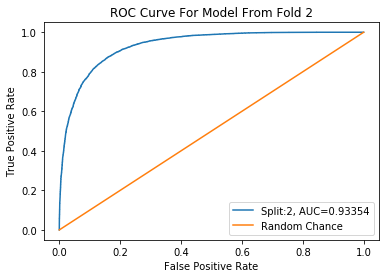

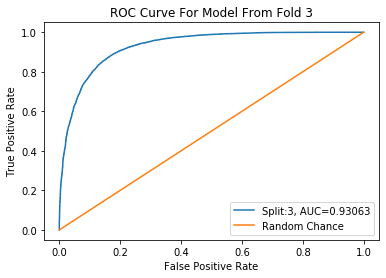

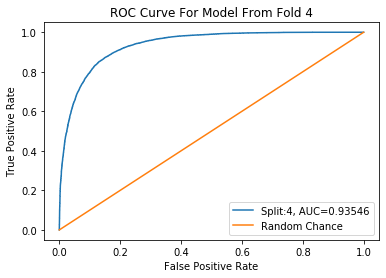

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

skf = StratifiedKFold(n_splits=4) # Spliting 4 times for cross validation 
X = numpy_data[:,:-1] #Separating values and y values
y = numpy_data[:,-1]

#Iterating to fit model on each fold
for i, (train, test) in enumerate(skf.split(X, y)):
    weights = GradientDescentFit(numpy_data[train], .10)
    pred_probs = logisticreg(numpy_data[test],weights)
    true_classes = y[test]
    auc = metrics.roc_auc_score(true_classes,pred_probs)
    fpr, tpr, thresholds = metrics.roc_curve(true_classes,  pred_probs)
    plt.plot(fpr,tpr,label='Split:'+str(i+1)+', AUC={0:.5f}'.format(auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve For Model From Fold ' + str(i+1))
    boundary = [0.0, 1.0]
    plt.plot(boundary, boundary, label='Random Chance')
    plt.legend(loc=4)
    plt.show()



(m) When one fits a model, they generally fit it  on a training data set first. The goal of most modelling is to produce a model that will generalize well to any set of data that is provided. However, since we only fit our model on training data, we cannot be sure that our model will perform well in practice. Cross-validation allows one to gain some insight into how well a model will perform on unavailable data.

Additionally, cross-validation also helps you determine how flexible your model should be. A model with high variance may have performance that changes wildly across each individual fitted fold. Checking cross-validation performance can help ensure that you aren't inadvertently overfitting. Thus, cross-validation can serve as one way you can compare potential models to choose from. 

(n) Make two plots - one of your training data, and one for your test data - with the data scatter-plot and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**Answer**

In [10]:
#Calculate the weights for the model using the training data
weights_train = GradientDescentFit(numpy_data, .10)
predicted_train = logisticreg(numpy_data,weights_train)

#Find the optimal cutoff value for the data. 
def Find_Cutoff(target, predicted):
    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

print(Find_Cutoff(y, predicted_train))

[0.52344472110722]


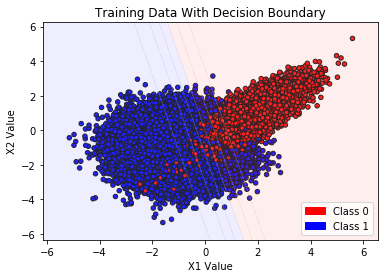

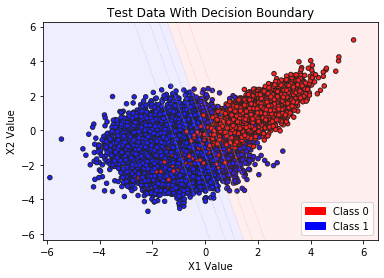

In [11]:
#Create a scatterplot of both the training and test sets with the decision boundary displayed. 
from sklearn.datasets import make_moons 
import matplotlib
import matplotlib.patches as mpatches
from random import sample
from matplotlib.colors import ListedColormap
#Training data
train_label = training[:,-1]
#Calculate the weights for the model using the training data
weights_train = GradientDescentFit(training, .80)



#Creaing label/legend patches for graph
red_patch = mpatches.Patch(color='red', label='Class 0') #Generating legend colors and text
blue_patch = mpatches.Patch(color='blue', label='Class 1')

#Create grid of x values that we can apply our weights to. 
x1_min, x1_max = training[:, 0].min() - 1,training[:, 0].max() + 1
x2_min, x2_max = training[:, 1].min() - 1, training[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                     np.arange(x2_min, x2_max, 0.1))
line = np.exp(weights_train[0] + weights_train[1] * xx +  weights_train[2] * yy) 
z =  line/ (1+line)
Z = logisticreg((np.c_[xx.ravel(), yy.ravel()]), weights_train) #Generating predictions to be turned into colored regions of classes.
Z = Z.reshape(xx.shape)
Z = z.reshape(xx.shape)
colors = ['red', 'blue']
color_map = ListedColormap(['#FFAAAA', '#AAAAFF']) #Setting colors for background
plt.scatter(training[:,0], training[:,1], c = train_label, s=20, edgecolor = 'k', cmap = matplotlib.colors.ListedColormap(colors))
plt.contourf(xx, yy, Z, alpha=0.2, cmap = color_map)
plt.title('Training Data With Decision Boundary')
plt.xlabel('X1 Value')
plt.ylabel('X2 Value')
plt.legend(handles=[red_patch, blue_patch], loc = 'lower right', fontsize = '10')
plt.show()




#Repeating the previous process using the test data
test_label = test_data[:,-1]
plt.scatter(test_data[:,0], test_data[:,1], c = test_label, s=20, edgecolor = 'k', cmap = matplotlib.colors.ListedColormap(colors))
plt.contourf(xx, yy, Z, alpha=0.2, cmap = color_map)
plt.title('Test Data With Decision Boundary')
plt.xlabel('X1 Value')
plt.ylabel('X2 Value')
plt.legend(handles=[red_patch, blue_patch], loc = 'lower right', fontsize = '10')
plt.show()

(n) It does appear that the decision boundary could be improved. Currently there are a number of observations within class 0 that are being misclassified. However, it looks like we would need to make our model more flexible in order to be able to capture the non=linearity of the decision boundary. This would require significant transformation of the data or a different classification technique. 

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.

**(c)** How many examples are present in each class? Show a histogram of samples by class. Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

(a) Constructing full dataset from subsets.

In [12]:
from keras.datasets import mnist

Using TensorFlow backend.


In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(b) Plotting threes and non-threes.

In [14]:
sum(y_train)

267236

In [15]:
#Plotting ten threes and 10 non-threes.
y_train_arr = np.array(y_train)
three_indices = np.where((y_train_arr==3))
threes = X_train[three_indices]
non_three_indices = np.where((y_train_arr!=3))
non_threes = X_train[non_three_indices]

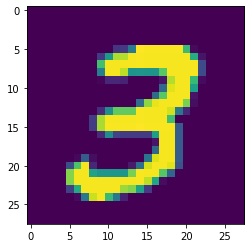

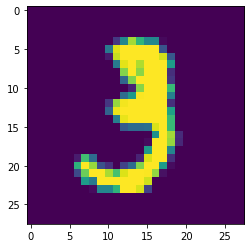

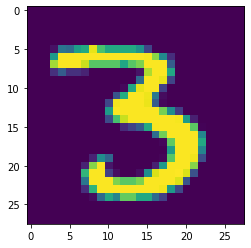

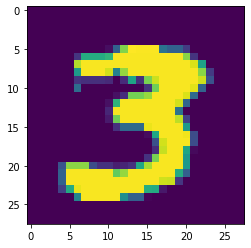

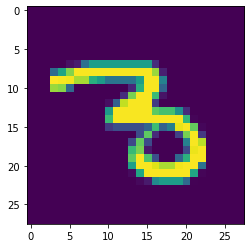

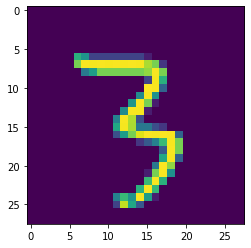

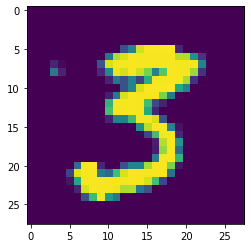

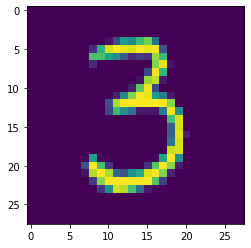

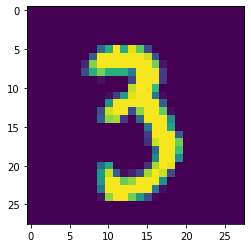

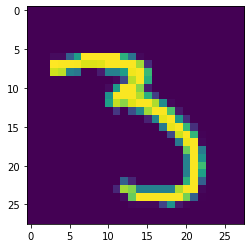

In [16]:
#Printing ten threes
for i in range(10):
    plt.imshow(threes[i])
  
    plt.show()

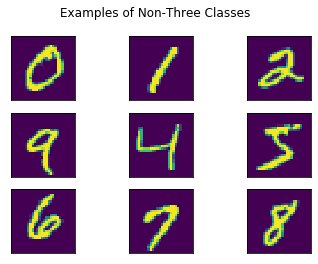

In [17]:
#Printing non-threes
figure = plt.figure()
for i in [x for x in range(10) if x != 3]:
    num_indices= np.where((y_train_arr==i))
    num = X_train[num_indices]
    if i <9:
        plt.subplot(330 + i+1)
        plt.imshow(num[0])
    else:
        plt.subplot(334)
        plt.imshow(num[0])
    #Removing labels
    plt.xticks([])
    plt.yticks([])
figure.suptitle('Examples of Non-Three Classes')
plt.show()

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


([<matplotlib.axis.XTick at 0x1b9f1cfeb00>,
 <a list of 11 Text xticklabel objects>)

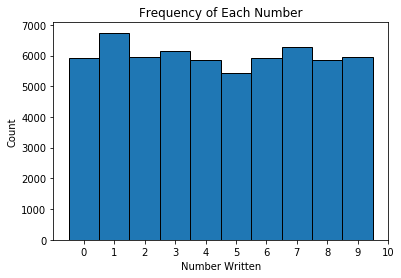

In [18]:
#Checking how many occurances of each class. 
classes, counts = np.unique(y_train_arr, return_counts=True)
class_count = dict(zip(classes, counts))
print(class_count)
#Plotting histogram of numbers/classes.
mybins =np.arange(y_train.min(), y_train.max()+2)
plt.hist(y_train, bins=mybins-.5,histtype='bar', ec='black')
plt.ylabel('Count')
plt.xlabel('Number Written')
plt.title('Frequency of Each Number')
plt.xticks(mybins)

In [19]:
#Converting data from indiviudal numbers to 3 and  other.
binary_train = (y_train == 3)
binary_train = binary_train.astype(int)
binary_test = (y_test == 3)
binary_test = binary_test.astype(int)
print(np.mean(binary_train))
print(np.mean(binary_test))

0.10218333333333333
0.101


**(c)** How many examples are present in each class? Show a histogram of samples by class. Are the classes balanced? What issues might this cause?

0:5923

1:6742

2:5958

3:6131

4:5842

5:5421

6:5918

7:6265

8:5851

9:5949
The classes are relatively balanced across each of the numbers. However, once we convert our target to being a binary 3/other, we will have the vast majority as class other. It is possible that our algorithm will overpredict the other class in order to maximize/minimize whatever function it uses to fit itself. 



**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

X_train y_train
X_test y_test

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
#Preprocessing images to be used by the classifier
train_rows, train_numx, train_numy = X_train.shape
train_dataset = X_train.reshape((train_rows,train_numx*train_numy))

#Repeating for test data
test_rows, test_numx, test_numy = X_test.shape
test_dataset = X_test.reshape((test_rows,test_numx*test_numy))
#K-fold cross validation. 
kfold4 = StratifiedKFold(n_splits = 4)
for i, (train, validation) in enumerate(kfold4.split(train_dataset, binary_train)):
    tree_small= tree.DecisionTreeClassifier()
    tree_small.fit(train_dataset[train],binary_train[train])
    small_tree_score = tree_small.score(train_dataset[validation], binary_train[validation])
    random_forest = RandomForestClassifier()
    random_forest.fit(train_dataset[train],binary_train[train])
    forest_score = random_forest.score(train_dataset[validation],binary_train[validation])
    print('Decision Tree:{}, Random Forest:{}'.format(small_tree_score, forest_score))

Decision Tree:0.9636690887274182, Random Forest:0.975534964335711
Decision Tree:0.9617333333333333, Random Forest:0.9792666666666666
Decision Tree:0.9614666666666667, Random Forest:0.9766666666666667
Decision Tree:0.9629308620574705, Random Forest:0.978931928795253


In [22]:
np.random.rand
#Creating random guess classifier
def randomprobs(y_values):
    guesses = np.random.rand(len(y_values),1)
    return (guesses)


#Creating vector where all are classified as three

def allones(y_values):
    onevec = np.ones(len(y_values))
    return(onevec)

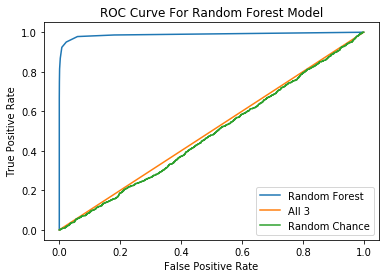

In [23]:
#The classifier I will be using is the random forest classifier with default parameters. 
final_forest = RandomForestClassifier()
final_forest.fit(train_dataset, binary_train)
random_forest_predict = final_forest.predict_proba(test_dataset)[:,1]

#Fitting Roc Curve
fpr, tpr, thresholds = metrics.roc_curve(binary_test,  random_forest_predict)
Rfpr, Rtpr, Rthresholds = metrics.roc_curve(binary_test,randomprobs(binary_test))
plt.plot(fpr,tpr, label= 'Random Forest')
Thrfpr, Thrtrp, thresholds = metrics.roc_curve(binary_test, allones(binary_test))
plt.plot(Thrfpr, Thrtrp, label = 'All 3')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Random Forest Model')
boundary = [0.0, 1.0]
plt.plot(Rfpr, Rtpr, label='Random Chance')
plt.legend(loc=4)
plt.show()





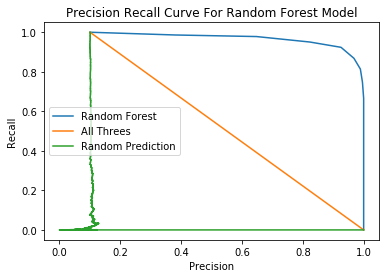

In [24]:
from sklearn.metrics import precision_recall_curve
#Fitting Precision Recall Curve

precision, recall,thresholds = precision_recall_curve(binary_test,  random_forest_predict)
Rprecision, RRecall, Rthresholds = precision_recall_curve(binary_test,randomprobs(binary_test))
ThrPrecision, ThRecall, thresholds = precision_recall_curve(binary_test, allones(binary_test))
plt.plot(precision,recall, label= 'Random Forest')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve For Random Forest Model')
plt.plot(ThrPrecision, ThRecall, label='All Threes')
plt.plot(Rprecision,RRecall, label='Random Prediction' )
plt.legend(loc = 'center left')
plt.show()

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

In [35]:
from sklearn.linear_model import LogisticRegression

#Building multiple linear regression models with lasso regularization Each one has a different regularization strength.
num_params =[]
model_costs = []
f1_scores = []
AUCs = []


In [38]:
for i in range(20):
    print(i)
    LogModel = LogisticRegression(penalty='l1', C = 1/(i+1))

    LogModel.fit(train_dataset, binary_train)

    pred_logmodel = LogModel.predict(train_dataset)

    num_params.append(np.count_nonzero(LogModel.coef_)) #Add number of non-zero parameters.

    model_costs.append(CostFunction(binary_train, pred_logmodel)) #Add cost to array

    AUCs.append(metrics.roc_auc_score(binary_train, pred_logmodel))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


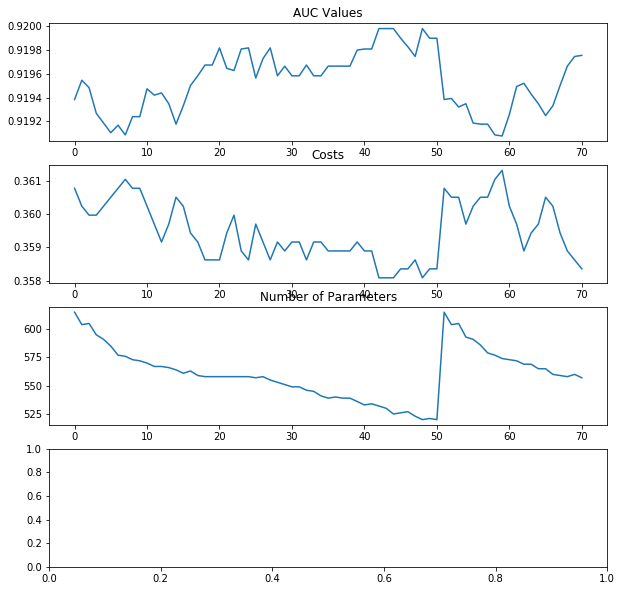

In [52]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(4,1, figsize=(10,10))
ax1.plot(AUCs, label= 'AUC')
ax1.set_title('AUC Values')


ax2.plot(model_costs)
ax2.set_title('Costs')

ax3.plot(num_params)
ax3.set_title('Number of Parameters')
plt.show()

## 3

### [10 points] Comparing the Bayes' decision rule with logistic regression

The phrase "Bayes' decision rule" is often used to describe a classifier decision rule that minimizes misclassification rate (equally penalizing false positives and false negatives). In this exercise you will first determine the Bayes's decision rule for a binary classification problem where you know the likelihood of date from each class. The binary classification problem has two classes with data distributed as exponential random variables:

$$P(x|C_i) = \lambda_i e^{-\lambda_i x}$$

Where $C_i$ represents the class from which the sample is drawn (0 or 1). We also know that $\lambda_0 = 1$ and $\lambda_1 = 5$.

**(a)** Plot the probability of each class conditional distribution (e.g. likelihood function), $P(x|C_0)$ and $P(x|C_1)$ on the sample plot in the domain $x \in [0,2]$. *You can use [`scipy`'s `expon` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) for this. Note that the `scale` parameter for this module is defined as $1/\lambda$.*

**(b)** Assuming the prior class distributions are $P(C_0)=P(C_1)=0.5$, determine the Bayes' decision rule using the information above including the posterior distributions and the prior distributions. You will assign the most probable class to the data based on the value of $x$. The decision rule will be of the form: 

If $x > x^*$, then predict Class 0, otherwise predict Class 1

Determine the value $x^*$ that minimizes misclassification (equally penalizing false positives and false negatives, and no penalty/reward for correct detections). Show your work in deriving this value.

**(c)** How does your answer in (b) relate to the the plot you made in (a)? Why?

**(d)** Load the test data in the file `A3_Q3_test.csv`. Apply your decision rule to the data. What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?

**(e)** Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters). What is your misclassification error for your test dataset? How does this compare with the Bayes' classifier?

**(f)** What is your decision rule for your logistic regression model? To compute this, extract the parameters from your fit model (look for the `coef_` and `intercept_` attributes) and since the classes are balanced, the decision rule will be to classify a sample $x$ as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?

**(g)** If the prior probabilities were not $P(C_0)=P(C_1)=0.5$, but instead if P(C_1)>P(C_0). How would this impact the optimal decision rule? Would it change, if so, would $x^*$ be larger or smaller?

**ANSWER**

## 4

### [30 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. You're encouraged to be creative.

**(b)** Download the data and plot the data to describe it. You can use any dataset of interest to you with the exception of the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset. Possible sources of dataset include (but are not limited to):

- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [Amazon Open Datasets](https://registry.opendata.aws/)
- [Microsoft's Open Data](https://msropendata.com/)
- [Google's Dataset Search](https://datasetsearch.research.google.com/)
- [Awesomedata's list of datasets](https://github.com/awesomedata/awesome-public-datasets)

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it. Summarize the conclusions from your work (this should involve a degree of interpretation more so than "my classifier achieved an AUC of 0.8").

*This grade for this question is based on (a) the completeness of the answer in addressing each of the above components, (b) the quality of the work and accuracy of the interpretation of the results of the analysis, (c) the presentation and professionalism of the work, and (d) the amount of creativity demonstrated by the work.*

**ANSWER**